## Contoh Validasi

In [1]:
import calendar
import pandas as pd
from datetime import datetime, timedelta
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

        
def convert_ordinal_to_date(ordinal):
    return datetime.fromordinal(int(ordinal)).strftime('%Y-%m-%d')

def convert_hash_to_idruangan(id_ruangan):
    maching_room = None
    for room in ruang:
        hashed = hash(room)
        if hashed == id_ruangan:
            maching_room = room
    return maching_room

def convert_minutes_to_time(minutes):
    hours, remainder = divmod(minutes, 60)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"

def convert_time_to_minutes(tm):
    tm_obj = datetime.strptime(tm, '%H:%M:%S')
    return tm_obj.hour * 60 + tm_obj.minute

def restore_original_format(array_jadwal):
    for jadwal in array_jadwal:
        jadwal['tanggal'] = convert_ordinal_to_date(jadwal['tanggal'])
        jadwal['tm_start'] = convert_minutes_to_time(int(jadwal['tm_start']))
        jadwal['tm_finish'] = convert_minutes_to_time(int(jadwal['tm_finish']))
        jadwal['id_ruangan'] = convert_hash_to_idruangan(jadwal['id_ruangan'])
    return array_jadwal


def evaluasi_tabrakan(array_jadwal):
    features = ['tanggal', 'tm_start', 'tm_finish', 'id_ruangan']
    label = 'status_jadwal'

    data_latih = []
    labels = []
    indeks_tabrakan = []

    for jadwal in array_jadwal:
        jadwal['tanggal'] = datetime.strptime(jadwal['tanggal'], '%Y-%m-%d').toordinal()
        jadwal['tm_start'] = convert_time_to_minutes(jadwal['tm_start'])
        jadwal['tm_finish'] = convert_time_to_minutes(jadwal['tm_finish'])
        jadwal['id_ruangan'] = hash(jadwal["id_ruangan"])

        input_data = [jadwal[feature] for feature in features]
        label_value = 1 if jadwal[label] == 'Tabrakan' else 0
        data_latih.append(input_data)
        labels.append(label_value)

    model = DecisionTreeClassifier()
    model.fit(data_latih, labels)
    y_pred = model.predict(data_latih)

    # Identify conflicting schedules
    for i, is_conflict in enumerate(y_pred):
        if is_conflict == 1:
            indeks_tabrakan.append(i)

    # Print conflicting schedules
    print("Jadwal yang tabrakan:")
    for i in indeks_tabrakan:
        jadwal = array_jadwal[i]
        print(
            f"{jadwal['nama_jadwal']} - {jadwal['id_ruangan']} - {jadwal['tanggal']} - {jadwal['tm_start']} - {jadwal['tm_finish']} - {jadwal['status_jadwal']}"
        )

    print("Sisa Jadwal setelah dihapus.")
    array_jadwal = [jadwal for i, jadwal in enumerate(array_jadwal) if i not in indeks_tabrakan]
    array_jadwal = restore_original_format(array_jadwal)

    lihat_jadwal(array_jadwal)
    return array_jadwal


def tambah_jadwal(arr_jadwal, jadwal):
    arr_jadwal.append(jadwal)
    return arr_jadwal

def lihat_jadwal(arr_jadwal):
    if not arr_jadwal:
        print("Belum ada jadwal.")
    else:
        print("\nDaftar Jadwal:")
        for i, jadwal in enumerate(arr_jadwal, start=1):
            print(f"{i}. {jadwal['nama_jadwal']} - {jadwal['id_ruangan']} - {jadwal['tanggal']} - {jadwal['tm_start']} - {jadwal['tm_finish']} - {jadwal['status_jadwal']}")

def hapus_jadwal(arr_jadwal, indeks):
    if 1 <= indeks <= len(arr_jadwal):
        removed_jadwal = arr_jadwal.pop(indeks - 1)
        print(f"Jadwal {removed_jadwal} telah dihapus.")
    else:
        print("Indeks tidak valid. Tidak ada jadwal yang dihapus.")

def duplikasi_jadwal(data_jadwal):
    print("Daftar Jadwal yang Tersedia:")
    for i, jadwal in enumerate(data_jadwal, start=1):
        print(f"{i}. {jadwal['nama_jadwal']} - {jadwal['id_ruangan']} - {jadwal['tanggal']} - {jadwal['tm_start']} - {jadwal['tm_finish']} - {jadwal['status_jadwal']}")

    nomor_jadwal = int(input("Pilih nomor jadwal yang ingin di-duplicate: ")) - 1
    jumlah_duplikasi = int(input("Masukkan jumlah duplikasi: "))
    interval_duplikasi = int(input("Masukkan interval duplikasi (dalam hari): "))

    jadwal_duplicated = data_jadwal[nomor_jadwal].copy()
    tanggal_awal = datetime.strptime(jadwal_duplicated['tanggal'], '%Y-%m-%d')

    for i in range(jumlah_duplikasi):
        tanggal_awal += timedelta(days=interval_duplikasi)
        jadwal_duplicated['tanggal'] = tanggal_awal.strftime('%Y-%m-%d')
        data_jadwal.append(jadwal_duplicated.copy())

    print(f"{jumlah_duplikasi} jadwal berhasil di-duplicate.")
    return data_jadwal

# Inisialisasi array untuk menyimpan jadwal
array_jadwal = [
    {
        'id_jadwal': 'J001',
        'id_ruangan': 'GF.101',
        'nama_jadwal': 'Rapat Fakultas',
        'tanggal': '2023-11-14',
        'tm_start': '11:00:00',
        'tm_finish': '13:00:00',
        'jenis_jadwal': 'Rapat',
        'status_jadwal': 'Dalam Pemesanan',
        'keterangan': 'iyah lagi'
    },
]

# Kode tambahan untuk hash ruangan
ruang = [
    "GF.101",
    "GF.102",
    "GF.103",
    "GF.Lab-Software",
    "GF.201",
    "GF.202",
    "GF.203",
    "GF.204",
    "GF.301",
    "GF.302",
    "GF.303",
    "GF.304",
    "GF.Lab-Hardware",
]

# Main program
menu_utama = """\nMenu:
1. Tambah Jadwal
2. Lihat Jadwal
3. Hapus Jadwal
4. Duplikasi Jadwal
5. Evaluasi Tabrakan
6. Keluar
"""

while True:
    print(menu_utama)
    pilihan = input("Pilih menu (1/2/3/4/5/6): ")

    if pilihan == "1":
        # Input data jadwal
        id_jadwal = input("Masukkan ID Jadwal: ")
        id_ruangan = input("Masukkan ID Ruangan: ")
        nama_jadwal = input("Masukkan Nama Jadwal: ")
        tanggal = input("Masukkan Tanggal (YYYY-MM-DD): ")
        tm_start = input("Masukkan Jam Mulai (HH:MM:SS): ")
        tm_finish = input("Masukkan Jam Selesai (HH:MM:SS): ")
        jenis_jadwal = input("Masukkan Jenis Jadwal: ")
        status_jadwal = input("Masukkan Status Jadwal: ")
        keterangan = input("Masukkan Keterangan: ")

        waktu_mulai = datetime.strptime(tm_start, "%H:%M:%S").time()
        waktu_akhir = datetime.strptime(tm_finish, "%H:%M:%S").time()
        delta = datetime.combine(datetime(1, 1, 1).date(), waktu_akhir) - datetime.combine(datetime(1, 1, 1).date(), waktu_mulai)
        rentang_waktu = delta.total_seconds() / 3600

        jadwal_dict = {
            'id_jadwal': id_jadwal,
            'id_ruangan': id_ruangan,
            'nama_jadwal': nama_jadwal,
            'tanggal': tanggal,
            'tm_start': tm_start,
            'tm_finish': tm_finish,
            'rentang_waktu': rentang_waktu,
            'jenis_jadwal': jenis_jadwal,
            'status_jadwal': status_jadwal,
            'keterangan': keterangan
        }

        array_jadwal = tambah_jadwal(array_jadwal, jadwal_dict)
        print("Jadwal berhasil ditambahkan.")

    elif pilihan == "2":
        lihat_jadwal(array_jadwal)

    elif pilihan == "3":
        lihat_jadwal(array_jadwal)
        indeks_hapus = input("Masukkan indeks jadwal yang ingin dihapus: ")
        if indeks_hapus.isdigit():
            hapus_jadwal(array_jadwal, int(indeks_hapus))
        else:
            print("Indeks tidak valid. Silakan masukkan angka.")

    elif pilihan == "4":
        array_jadwal = duplikasi_jadwal(array_jadwal)

    elif pilihan == "5":
        array_jadwal = evaluasi_tabrakan(array_jadwal)

    elif pilihan == "6":
        print("Program selesai.")
        break

    else:
        print("Pilihan tidak valid. Silakan pilih menu yang sesuai.")

ModuleNotFoundError: No module named 'pandas'

# Optimasi Manajemen dan Peningkatan Efisiensi Penjadwalan Kampus UMKT dengan Metode Decision Regression Tree
## Optimasi Manajemen dan Peningkatan Efisiensi Penjadwalan Kampus UMKT dengan Metode Decision Tree Classifier
## Klasifikasi Manajemen Penjadwalan kelas di Kampus UMKT dengan Metode Decision Tree Classifier

1. *Ketersediaan Ruang dan Sumber Daya*: Jadwal dianggap optimal jika dapat memanfaatkan sumber daya kampus dengan efisien. Ini mencakup memastikan bahwa ruang kuliah tersedia, penggunaan tenaga pengajar yang seimbang, dan akses ke fasilitas pendukung lainnya.

2. *Minimisasi Bentrok Jadwal*: Jadwal yang baik akan mencoba meminimalkan bentrok jadwal untuk mahasiswa dan dosen, sehingga tidak ada tumpang tindih dalam jadwal mata kuliah.

3. *Waktu dan Durasi Kuliah yang Efisien*: Jadwal yang optimal juga mencakup pengaturan waktu dan durasi kuliah yang efisien. Ini berarti mempertimbangkan jarak antara kelas, memberikan cukup waktu istirahat, dan memaksimalkan penggunaan jam belajar.

4. *Prioritas Mata Kuliah dan Ketersediaan Dosen*: Jadwal optimal juga dapat mempertimbangkan prioritas mata kuliah tertentu, kebutuhan spesifik dosen, dan keinginan mahasiswa untuk memaksimalkan kepuasan pengguna.

5. *Pengurangan Konflik Dosen*: Menjaga agar dosen tidak terlalu terlibat dalam jadwal yang bersamaan sehingga mereka dapat memberikan perhatian yang baik kepada setiap mata kuliah yang mereka ajar.

6. *Kualitas Kehidupan Mahasiswa*: Jadwal yang optimal juga dapat mempertimbangkan kualitas kehidupan mahasiswa dengan menghindari jadwal yang terlalu padat atau jadwal larut malam.

In [42]:
import pandas as pd
from tabulate import tabulate
import datetime

ruang = [
    "GF.101",
    "GF.102",
    "GF.103",
    "GF.Lab-Software",
    "GF.201",
    "GF.202",
    "GF.203",
    "GF.204",
    "GF.301",
    "GF.302",
    "GF.303",
    "GF.304",
    "GF.Lab-Hardware",
]

nm_jadwal=[
    "Kalkulus",
    "Sistem Digital dan Arsitektur Komputer",
    "Rapat Fakultas",
    "Dasar Pemrograman",
    "Praktikum Dasar Pemrograman",
    "Aljabar Linear",
    "Rapat Prodi",
    "Costume",
]

jenis_jd = [
    "Perkuliahan",
    "Rapat",
    "Event",
    "Kerja kelompok",
    "Seminar",
    "Costume",
]

# Fungsi untuk membaca data jadwal dari file CSV
def baca_data_jadwal(nama_file):
    try:
        df = pd.read_csv(nama_file)
        return df
    except FileNotFoundError:
        print("File tidak ditemukan.")
        return None

def tampilkan_jadwal_berdasarkan_id(data_jadwal, id_jadwal):
    jadwal = data_jadwal[data_jadwal['id_jadwal'] == id_jadwal]
    return jadwal
    
# Fungsi untuk menulis data jadwal ke dalam file CSV
def tulis_data_jadwal(nama_file, data_jadwal):
    try:
        data_jadwal.to_csv(nama_file, index=False)
        print("Data jadwal berhasil ditulis ke dalam file.\n")
    except Exception as e:
        print(f"Terjadi kesalahan: {str(e)}")



def get_next_jadwal_id(data_jadwal):
    if data_jadwal.empty:
        return "J001" 
    else:
        last_id = data_jadwal['id_jadwal'].max()
        if pd.notna(last_id):
            last_id = str(last_id)
            if last_id[0] == 'J' and last_id[1:].isdigit():
                last_number = int(last_id[1:])
                next_number = last_number + 1
                next_id = f"J{next_number:03d}"
                return next_id

    return "J001"
            
# Fungsi untuk menambahkan jadwal baru
def tambah_jadwal(data_jadwal):
    id_jadwal = get_next_jadwal_id(data_jadwal)
    print()

    print("Daftar Ruangan yang Tersedia:")
    for i, r in enumerate(ruang, start=1):
        print(f"{i}. {r}")

    # Meminta pengguna memilih ruangan
    while True:
        try:
            pilihan_ruangan = int(input("Pilih ruangan (nomor): "))
            if 1 <= pilihan_ruangan <= len(ruang):
                id_ruangan = ruang[pilihan_ruangan - 1]
                print(f"ID Ruangan yang dipilih: {id_ruangan}")
                break
            else:
                print("Nomor ruangan tidak valid. Silakan pilih nomor yang sesuai.")
        except ValueError:
            print("Masukkan nomor ruangan yang valid.")

    print()
    print("Daftar Jadwal yang Tersedia:")
    for i, r in enumerate(nm_jadwal, start=1):
        print(f"{i}. {r}")

    while True:
        try:
            pilih_jadwal = int(input("Pilih Jadwal (Nomor): "))
            if 1 <= pilih_jadwal <= len(nm_jadwal):
                if pilih_jadwal == 8:
                    nama_jadwal = input("Masukkan Nama Jadwal: ")
                    print(f"Jadwal yang dipilih: {nama_jadwal}")
                    break
                nama_jadwal = nm_jadwal[pilih_jadwal-1]
                print(f"Jadwal yang dipilih: {nama_jadwal}")
                break
            else:
                print("Nomor yang pilih tidak valid, Silahkan pilih lagi.")

        except ValueError:
            print("Pilihan tidak valid.")
            nama_jadwal = ""

    print()
    tanggal = input("Masukkan Tanggal (YYYY-MM-DD): ")
    waktu_mulai = input("Masukkan Jam Mulai (HH:MM:SS): ")
    waktu_akhir = input("Masukkan Jam Selesai (HH:MM:SS): ")
    
    tanggal_dt = datetime.datetime.strptime(tanggal, "%Y-%m-%d")
    waktu_mulai_dt = datetime.datetime.combine(tanggal_dt.date(), datetime.datetime.strptime(waktu_mulai, "%H:%M:%S").time())
    waktu_akhir_dt = datetime.datetime.combine(tanggal_dt.date(), datetime.datetime.strptime(waktu_akhir, "%H:%M:%S").time())
    delta = waktu_akhir_dt - waktu_mulai_dt
    rentang_waktu = delta.total_seconds() / 3600  

    # Fungsi untuk mendeteksi tabrakan jadwal
    # Ubah waktu mulai dan waktu akhir ke dalam format datetime
    tm_start = datetime.datetime.strptime(waktu_mulai, "%H:%M:%S").time()
    tm_finish = datetime.datetime.strptime(waktu_akhir, "%H:%M:%S").time()

    # Filter jadwal berdasarkan id_ruangan dan tanggal
    jadwal_sama_ruangan_tanggal = data_jadwal[(data_jadwal['id_ruangan'] == id_ruangan) & (data_jadwal['tanggal'] == tanggal)]

    for _, jadwal in jadwal_sama_ruangan_tanggal.iterrows():
        jadwal_mulai = pd.to_datetime(jadwal['tm_start'], format="%H:%M:%S").time()
        jadwal_akhir = pd.to_datetime(jadwal['tm_finish'], format="%H:%M:%S").time()

        # Cek tabrakan waktu
        if (tm_start < jadwal_akhir) and (tm_finish > jadwal_mulai):
            id_jadwal = jadwal['id_jadwal']
            print(f"Jadwal bertabrakan dengan jadwal {id_jadwal}")
            print("Silahkan input ulang:")
            # Handle error di sini
            raise ValueError("Jadwal bertabrakan. Silahkan input ulang.")
            # Meminta pengguna memilih ruangan
            while True:
                try:
                    pilihan_ruangan = int(input("Pilih ruangan (nomor): "))
                    if 1 <= pilihan_ruangan <= len(ruang):
                        id_ruangan = ruang[pilihan_ruangan - 1]
                        print(f"ID Ruangan yang dipilih: {id_ruangan}")
                        break
                    else:
                        print("Nomor ruangan tidak valid. Silakan pilih nomor yang sesuai.")
                except ValueError:
                    print("Masukkan nomor ruangan yang valid.")

            print()
            tanggal = input("Masukkan Tanggal (YYYY-MM-DD): ")
            waktu_mulai = input("Masukkan Jam Mulai (HH:MM:SS): ")
            waktu_akhir = input("Masukkan Jam Selesai (HH:MM:SS): ")

            tanggal_dt = datetime.datetime.strptime(tanggal, "%Y-%m-%d")
            waktu_mulai_dt = datetime.datetime.combine(tanggal_dt.date(), datetime.datetime.strptime(waktu_mulai, "%H:%M:%S").time())
            waktu_akhir_dt = datetime.datetime.combine(tanggal_dt.date(), datetime.datetime.strptime(waktu_akhir, "%H:%M:%S").time())
            delta = waktu_akhir_dt - waktu_mulai_dt
            rentang_waktu = delta.total_seconds() / 3600  

            # Mengembalikan input ulang
        else:
            # Mengembalikan jika tidak ada tabrakan
            print("Jadwal tersedia, tidak ada tabrakan.")

    print()
    print("Daftar Jenis Jadwal yang Tersedia:")
    for i, r in enumerate(jenis_jd, start=1):
        print(f"{i}. {r}")

    while True:
        try:
            jenis_jadwal = int(input("Pilih Jenis jadwal (Nomor): "))
            if 1 <= jenis_jadwal <= len(jenis_jd):
                if jenis_jadwal == 8:
                    jenis_jadwal = input("Inputkan Kategori jadwal:")
                    print(f"Jadwal yang dipilih: {jenis_jadwal}")
                    break
                jenis_jadwal = jenis_jd[jenis_jadwal-1]
                print(f"Jadwal yang dipilih: {jenis_jadwal}")
                break
            else:
                print("Nomor yang pilih tidak valid, Silahkan pilih lagi.")

        except ValueError:
            print("Pilihan tidak valid.")
            jenis_jadwal = ""

    status_jadwal = "Dalam Pemesanan"
    keterangan = input("Masukkan Keterangan anda: ")

    if keterangan == "":
        keterangan = "-"

    # Ganti bagian ini pada pengaturan tm_start dan tm_finish
    tm_start = datetime.datetime.strptime(waktu_mulai, "%H:%M:%S").time()
    tm_finish = datetime.datetime.strptime(waktu_akhir, "%H:%M:%S").time()


    jadwal_baru = {
        "id_jadwal": [id_jadwal],
        "id_ruangan": [id_ruangan],
        "nama_jadwal": [nama_jadwal],
        "tanggal": [tanggal],
        "tm_start": [tm_start.strftime("%H:%M:%S")],
        "tm_finish": [tm_finish.strftime("%H:%M:%S")],
        "rentang_waktu": [rentang_waktu],
        "jenis_jadwal": [jenis_jadwal],
        "status_jadwal": [status_jadwal],
        "keterangan": [keterangan]
    }
    
    # Buat DataFrame baru untuk jadwal baru
    df_jadwal_baru = pd.DataFrame(jadwal_baru)
    
    # Gabungkan DataFrame jadwal baru dengan DataFrame utama
    data_jadwal = pd.concat([data_jadwal, df_jadwal_baru], ignore_index=True)
    
    return data_jadwal

    
def hapus_jadwal(data_jadwal, id_jadwal):
    data_jadwal = data_jadwal[data_jadwal['id_jadwal'] != id_jadwal]
    return data_jadwal
    
def edit_jadwal(data_jadwal, id_jadwal):
    jadwal = tampilkan_jadwal_berdasarkan_id(data_jadwal, id_jadwal)
    while True:
        if jadwal.empty:
            print(f"ID Jadwal {id_jadwal} tidak ditemukan.")
        else:
            print("Data Jadwal yang akan diubah:")
            print(jadwal)
    
            pilihan = input("Apakah Anda ingin mengedit jadwal ini? (y/n): ")
    
            if pilihan.lower() == "y":
                print("Pilih kolom yang ingin diubah:")
                print("1. ID Ruangan")
                print("2. Nama Jadwal")
                print("3. Tanggal")
                print("4. Jam Mulai")
                print("5. Jam Selesai")
                print("6. Jenis Jadwal")
                print("7. Status Jadwal")
                print("8. Keterangan")
                
                try:
                    kolom_pilihan = int(input("Pilih kolom (1/2/3/4/5/6/7/8): "))
                    if kolom_pilihan == 1:
                        # Edit ID Ruangan
                        print("Daftar Ruangan yang Tersedia:")
                        for i, r in enumerate(ruang, start=1):
                            print(f"{i}. {r}")
                        
                        while True:
                            pilihan_ruangan = int(input("Pilih ruangan (nomor): "))
                            if 1 <= pilihan_ruangan <= len(ruang):
                                new_id_ruangan = ruang[pilihan_ruangan - 1]
                                data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'id_ruangan'] = new_id_ruangan
                                print(f"ID Ruangan yang dipilih: {new_id_ruangan}")
                                break
                            else:
                                print("Nomor ruangan tidak valid. Silakan pilih nomor yang sesuai.")
                    
                        print()
                        
                    elif kolom_pilihan == 2:
                        # Edit Nama Jadwal
                        print("Daftar Jadwal yang Tersedia:")
                        for i, r in enumerate(nm_jadwal, start=1):
                            print(f"{i}. {r}")
                        
                        while True:
                            pilih_jadwal = int(input("Pilih Jadwal (Nomor): "))
                            if 1 <= pilih_jadwal <= len(nm_jadwal):
                                if pilih_jadwal == 8:
                                    nama_jadwal = input("Masukkan Nama Jadwal: ")
                                    data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'nama_jadwal'] = new_nama_jadwal
                                    print(f"Jadwal yang dipilih: {new_nama_jadwal}")
                                    break
                                    nama_jadwal = nm_jadwal[pilih_jadwal-1]
                                    data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'nama_jadwal'] = new_nama_jadwal
                                    print(f"Jadwal yang dipilih: {new_nama_jadwal}")
                                break
                                
                            else:
                                print("Nomor yang pilih tidak valid, Silahkan pilih lagi.")
                        print()
                        
                    elif kolom_pilihan == 3:
                        # Edit Tanggal
                        new_tanggal = input("Masukkan Tanggal yang baru (YYYY-MM-DD): ")
                        data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'tanggal'] = new_tanggal
                        print()
                    elif kolom_pilihan == 4:
                        # Edit Jam Mulai
                        new_jam_mulai = input("Masukkan Jam Mulai yang baru (HH:MM:SS): ")
                        data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'tm_start'] = datetime.datetime.strptime(new_jam_mulai, "%H:%M:%S").time()
                        delta = datetime.datetime.combine(datetime.date(1, 1, 1), data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'tm_finish']) - datetime.datetime.combine(datetime.date(1, 1, 1), data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'tm_start'])
                        data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'rentang_waktu'] = datetime.datetime.strptime(delta, "%H:%M:%S").time()
                        print()
                    elif kolom_pilihan == 5:
                        # Edit Jam Selesai
                        new_jam_selesai = input("Masukkan Jam Selesai yang baru (HH:MM:SS): ")
                        data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'tm_finish'] = datetime.datetime.strptime(new_jam_selesai, "%H:%M:%S").time()
                        delta = datetime.datetime.combine(datetime.date(1, 1, 1), data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'tm_finish']) - datetime.datetime.combine(datetime.date(1, 1, 1), data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'tm_start'])
                        data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'rentang_waktu'] = datetime.datetime.strptime(delta, "%H:%M:%S").time()
                        print()
                    elif kolom_pilihan == 6:
                        # Edit Jenis Jadwal
                        print()
                        print("Daftar Jenis pada jadwal:")
                        for i, r in unumerate(jenis_jd, start=1):
                            print(f"{i}. {r}")
    
                        while True:
                            pilih_jenis = int(input("Pilih Jenis jadwal: "))
                            if 1 <= pilih_jenis <= len(jenis_jd):
                                if pilih_jenis == 8:
                                    jenis_jadwal = input("Masukkan kategori jadwal anda: ")
                                    data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'jenis_jadwal'] = jenis_jadwal
                                    print(f"Kategori yang dimasukkan: {jenis_jadwal}")
    
                                jenis_jadwal = jadwal_jd[pilih_jenis-1]
                                data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'jenis_jadwal'] = jenis_jadwal
                                print(f"Kategori yang dipilih: {jenis_jadwal}")
                                break
                            else:
                                print("Nomor yang anda pilih tidak vaid, Silahkan coba lagi.")
                        print()
                    elif kolom_pilihan == 7:
                        # Edit Status Jadwal
                        new_status_jadwal = input("Masukkan Status Jadwal yang baru: ")
                        data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'status_jadwal'] = new_status_jadwal
                        print()
                    elif kolom_pilihan == 8:
                        # Edit Keterangan
                        new_keterangan = input("Masukkan Keterangan yang baru: ")
                        if new_keterangan == null:
                            new_keterangan = "-"
                            data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'keterangan'] = new_keterangan
                        data_jadwal.loc[data_jadwal['id_jadwal'] == id_jadwal, 'keterangan'] = new_keterangan
    
                    print("Jadwal berhasil diubah.")
                    tulis_data_jadwal(nama_file, data_jadwal)
                except ValueError:
                    print("Pilihan tidak valid.")
            else:
                print("Pengeditan dibatalkan.")
        break
    return data_jadwal

# Main program
menu_utama = """\nMenu:
1. Tambah Jadwal
2. Lihat Jadwal
3. Hapus Jadwal
4. Keluar
"""
if __name__ == "__main__":
    nama_file = "jadwal_ruangan.csv"  # Ganti dengan nama file yang sesuai

    data_jadwal = baca_data_jadwal(nama_file)

    if data_jadwal is None:
        # Buat DataFrame kosong jika file belum ada
        data_jadwal = pd.DataFrame(columns=["id_jadwal", "id_ruangan", "nama_jadwal", "tanggal", "tm_start", "tm_finish", "rentang_waktu", "jenis_jadwal", "status_jadwal", "keterangan"])

    while True:
        print(menu_utama)        

        pilihan = input(">>> Pilih menu (1/2/3/4): ")
        
        if pilihan == "1":
            try:
                data_jadwal = tambah_jadwal(data_jadwal)
                tulis_data_jadwal(nama_file, data_jadwal)
            except ValueError as e:
                print(f"Error: {e}")
        elif pilihan == "2":
            if data_jadwal.empty:
                print("Data jadwal kosong.")
            else:
                print(data_jadwal)
                while True:
                    p = input(">>> Apakah anda ingin menampilkan atau mengedit jadwal dengan id? (y/n): ")
                    if p == "y":
                        id_jadwal = input(">>> Masukkan Id Jadwal yang ingin anda tampilkan/edit: ")
                        jadwal = tampilkan_jadwal_berdasarkan_id(data_jadwal, id_jadwal)
                        if not jadwal.empty:
                            print(jadwal)
                            edit_option = input(">>> Apakah Anda ingin mengedit jadwal ini? (y/n): ")
                            if edit_option.lower() == "y":
                                data_jadwal = edit_jadwal(data_jadwal, id_jadwal)
                        else:
                            print(f"ID Jadwal {id_jadwal} tidak ditemukan\n")
                    else:
                        print("\nbaiklah kalo gitu saya kembalikan ke menu")
                        break
        elif pilihan == "3":
            while True:
                if data_jadwal.empty:
                    print("Data jadwal kosong, tidak ada yang bisa di hapus")
                    break
                else:
                    id_jadwal = input(">>> Masukkan ID Jadwal yang ingin Anda hapus: ")
                    data_jadwal = hapus_jadwal(data_jadwal, id_jadwal)
                    tulis_data_jadwal(nama_file, data_jadwal)
                    print(f"Jadwal dengan ID{id_jadwal} telah dihapus")
                    print(data_jadwal)
                    
        elif pilihan == "4":
            break
        else:
            print("Pilihan tidak valid. Silakan pilih menu yang benar.")
        print("\n"*2)



Menu:
1. Tambah Jadwal
2. Lihat Jadwal
3. Hapus Jadwal
4. Keluar

>>> Pilih menu (1/2/3/4): 1

Daftar Ruangan yang Tersedia:
1. GF.101
2. GF.102
3. GF.103
4. GF.Lab-Software
5. GF.201
6. GF.202
7. GF.203
8. GF.204
9. GF.301
10. GF.302
11. GF.303
12. GF.304
13. GF.Lab-Hardware
Pilih ruangan (nomor): 1
ID Ruangan yang dipilih: GF.101

Daftar Jadwal yang Tersedia:
1. Kalkulus
2. Sistem Digital dan Arsitektur Komputer
3. Rapat Fakultas
4. Dasar Pemrograman
5. Praktikum Dasar Pemrograman
6. Aljabar Linear
7. Rapat Prodi
8. Costume
Pilih Jadwal (Nomor): 4
Jadwal yang dipilih: Dasar Pemrograman

Masukkan Tanggal (YYYY-MM-DD): 2023-11-14
Masukkan Jam Mulai (HH:MM:SS): 15:00:00
Masukkan Jam Selesai (HH:MM:SS): 18:00:00
Jadwal tersedia, tidak ada tabrakan.
Jadwal tersedia, tidak ada tabrakan.

Daftar Jenis Jadwal yang Tersedia:
1. Perkuliahan
2. Rapat
3. Event
4. Kerja kelompok
5. Seminar
6. Costume
Pilih Jenis jadwal (Nomor): 1
Jadwal yang dipilih: Perkuliahan
Masukkan Keterangan anda: mantap


Akurasi: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       1.00      0.00      0.00       1.0
           4       0.00      1.00      0.00       0.0
           8       1.00      0.00      0.00       1.0

    accuracy                           1.00       2.0
   macro avg       0.50      0.50      0.00       2.0
weighted avg       1.00      0.00      0.00       2.0

Hasil Prediksi:
  Ruangan Sebenarnya Ruangan Prediksi
8               I909             E505
1               B202             A101


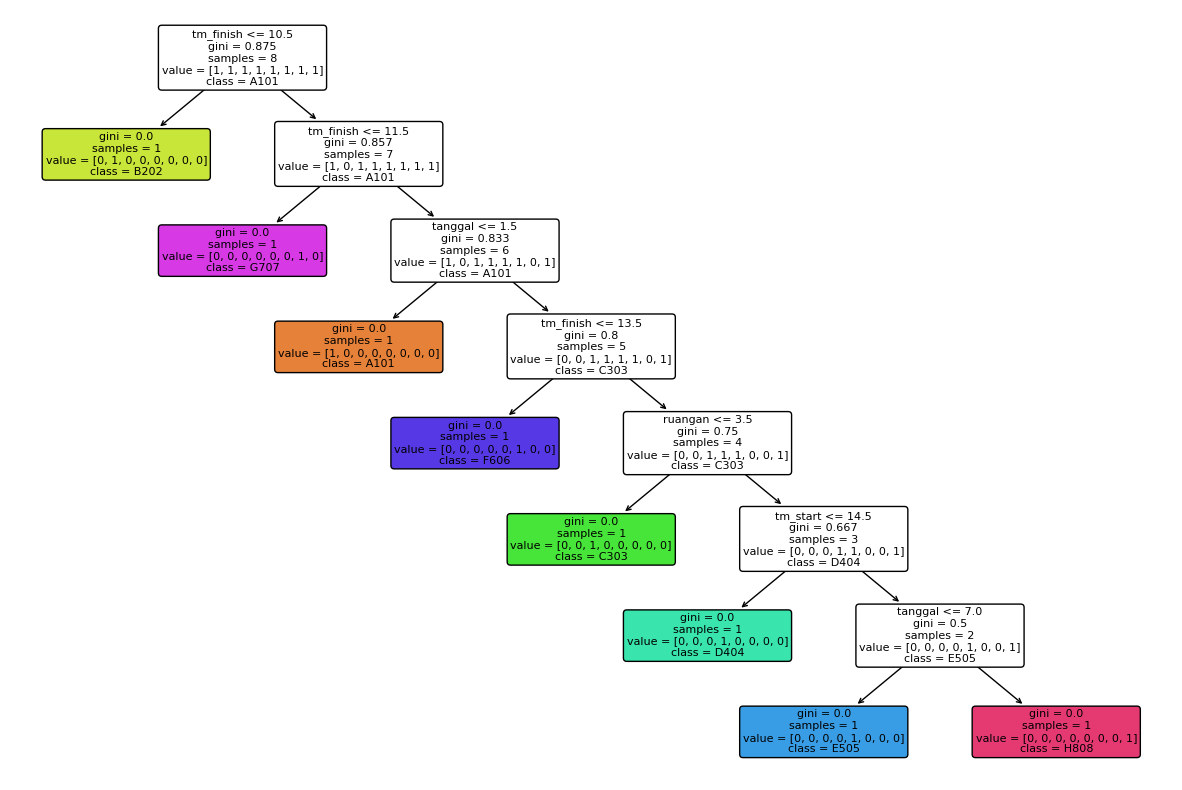

In [65]:
# Import library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Membuat dataset buatan (contoh)
data = {
    'id_jadwal': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'id_ruangan': ['GF-101', 'GF-102', 'GF-103', 'GF-104', 'GF-105', 'GF-106', 'GF-107', 'GF-108', 'GF-109', 'GF-110'],
    'nama_jadwal': ['Meeting1', 'Meeting2', 'Presentation1', 'Workshop1', 'Conference1', 'Seminar1', 'Meeting3', 'Presentation2', 'Workshop2', 'Conference2'],
    'tanggal': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'tm_start': [10, 11, 9, 13, 14, 15, 10, 9, 14, 15],
    'tm_finish': [12, 13, 10, 15, 16, 17, 12, 11, 16, 17],
    'rentang_waktu': [2, 2, 1, 2, 2, 2, 2, 2, 2, 2],
    'jenis_jadwal': ['Meeting', 'Meeting', 'Presentation', 'Workshop', 'Conference', 'Seminar', 'Meeting', 'Presentation', 'Workshop', 'Conference'],
    'status_jadwal': ['Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled', 'Scheduled'],
    'keterangan': ['Informal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal'],
    'ruangan': ['A101', 'B202', 'C303', 'D404', 'E505', 'F606', 'G707', 'H808', 'I909', 'J1010']
}

df = pd.DataFrame(data)

# Encode 'tanggal' and 'ruangan' columns using LabelEncoder
le = LabelEncoder()
df['tanggal'] = le.fit_transform(df['tanggal'])
df['ruangan'] = le.fit_transform(df['ruangan'])

# Memilih fitur utama untuk klasifikasi
X = df[['tanggal', 'tm_start', 'tm_finish', 'ruangan']]

# Label kelas yang akan diprediksi
y = df['ruangan']

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Mengukur kinerja model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)  # Setting zero_division to 1

# Menampilkan hasil
print(f'Akurasi: {accuracy}')
print('Classification Report:\n', classification_rep)

# Menampilkan hasil prediksi
print('Hasil Prediksi:')
df_results = pd.DataFrame({'Ruangan Sebenarnya': y_test, 'Ruangan Prediksi': y_pred})
df_results['Ruangan Sebenarnya'] = le.inverse_transform(df_results['Ruangan Sebenarnya'])
df_results['Ruangan Prediksi'] = le.inverse_transform(df_results['Ruangan Prediksi'])
print(df_results)

# Visualisasi pohon keputusan
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=list(X.columns), class_names=le.classes_.tolist(), rounded=True, fontsize=8)
plt.show()

# INPUT MATA KULIAH:
### ID_MATKUL char(16) NOT NULL
### nama_matkul char(50) NOT NULL
### sks char(50) NOT NULL
### kelas char(50) NOT NULL

In [3]:
import datetime
import pandas as pd
from tabulate import tabulate


waktu_awal = datetime.datetime.now().replace(hour=8, minute=0, second=0, microsecond=0)
waktu_batas = datetime.datetime.now().replace(hour=23, minute=59, second=59, microsecond=59)

# Fungsi untuk membaca data matkul dari file CSV
def baca_data_matkul(nama_file):
    try:
        df = pd.read_csv(nama_file)
        return df
    except FileNotFoundError:
        print("File tidak ditemukan.")
        return None

# Fungsi untuk menulis data matkul ke dalam file CSV
def tulis_data_matkul(nama_file, data_matkul):
    try:
        data_matkul.to_csv(nama_file, index=False)
        print("Data matkul berhasil ditulis ke dalam file.")
    except Exception as e:
        print(f"Terjadi kesalahan: {str(e)}")

def hitung_durasi_perkuliahan(sks):
    if sks == 1:
        return 170 
    elif sks == 2:
        return 100 
    elif sks == 3:
        return 150 
    else:
        return 0 

def input_data():
    kode = input("Masukkan kode matakuliah: ")
    name = input("Masukkan Nama matakuliah: ")
    sks = int(input("Masukkan jumlah SKS matakuliah: "))
    iya = int(input("Masukkan jumlah kelas dalam satu matakuliah: "))
    if iya >= 1:
        kelas = []
        for i in range(iya):
            kumkel = input("Masukkan nama kelas: ")
            kelas.append(kumkel)
    else:
        kelas = input("Masukkan nama kelas: ")    
    
    durasi_perkuliahan = hitung_durasi_perkuliahan(sks)
    
    if durasi_perkuliahan > 0:       
        waktu_selesai = waktu_awal + datetime.timedelta(minutes=durasi_perkuliahan)
    
        if waktu_selesai <= waktu_batas:
            print(f"Jadwal perkuliahan ({sks} SKS):")
            print(f"Mulai: {waktu_awal.strftime('%H:%M')} WIB")
            print(f"Selesai: {waktu_selesai.strftime('%H:%M')} WIB")
        else:
            print("Perkuliahan melewati jam 12 malam. Batas waktu tercapai.")
            break
    
        waktu_awal = waktu_selesai + datetime.timedelta(minutes=5)
    else:
        print("Jumlah SKS tidak valid. Masukkan 1, 2, atau 3 SKS.")

    matkul = {
        "kode_matakuliah" : code,
        'nama_matkul' : name,
        "sks" : sks,
        "kelas" : kelas
    }
    matkul = matkul.append(matkul_baru, ignore_index=True)
    return matkul



# Main program
if __name__ == "__main__":
    nama_file = "matkul.csv" 

    # Baca data mata kuliah dari file CSV (jika sudah ada)
    data_matkul = baca_data_matkul(nama_file)

    if data_matkul is None:
        # Buat DataFrame kosong jika file belum ada
        data_matkul = pd.DataFrame(columns=["kode_matkul", "nama_matkul", "sks", "kelas"])

    while True:
        print("\nMenu:")
        print("1. Tambah Jadwal")
        print("2. Lihat Jadwal")
        print("3. Keluar")

        pilihan = input("Pilih menu (1/2/3): ")

        if pilihan == "1":
            data_matkul = input_data(data_matkul)
            tulis_data_matkul(nama_file, data_matkul)
        elif pilihan == "2":
            print(data_matkul)
        elif pilihan == "3":
            break
        else:
            print("Pilihan tidak valid. Silakan pilih menu yang benar.")

SyntaxError: 'break' outside loop (2450789368.py, line 68)

# Gabut hehe

In [11]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [10]:
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime
from ipywidgets import interact, interactive, fixed, interact_manual

date_picker = widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

display(date_picker)

def on_date_change(change):
    if change['name'] == 'value' and change['new']:
        selected_date = change['new']
        formatted_date = selected_date.strftime('%Y-%m-%d')
        print(f"Tanggal yang dipilih: {formatted_date}")

def f(x):
    return x
    
date_picker.observe(on_date_change)
interact(f, x=10);
interact(f, x='Hi there!');

@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interact(f, x=['apples','oranges']);

interact(f, x=[('one', 10), ('two', 20)]);

DatePicker(value=None, description='Pick a Date', step=1)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

rentang tanggal 

In [1]:
import calendar
from datetime import datetime, timedelta

# Ambil tanggal saat ini
tanggal_sekarang = datetime.now()

# Buat format tanggal
tanggal_format = tanggal_sekarang.strftime('%d/%m/%Y')

# Tanyakan tanggal awal kepada user
tanggal_awal = input(f"Masukkan tanggal awal (format: dd/mm/yyyy) atau tekan enter untuk menggunakan tanggal saat ini ({tanggal_format}): ")

# Jika user tidak memasukkan tanggal awal, gunakan tanggal saat ini
if tanggal_awal == '':
    tanggal_awal = tanggal_sekarang
else:
    # Buat objek tanggal dari inputan user
    tanggal_awal = datetime.strptime(tanggal_awal, '%d/%m/%Y')

# Tampilkan kalender selama satu tahun
for i in range(12):
    print(f"\nKalender untuk bulan {tanggal_awal.strftime('%m/%Y')}:")
    calendar.prmonth(tanggal_awal.year, tanggal_awal.month)
    
    # Perbarui tanggal awal untuk bulan berikutnya
    tanggal_awal = tanggal_awal + timedelta(days=30)

Masukkan tanggal awal (format: dd/mm/yyyy) atau tekan enter untuk menggunakan tanggal saat ini (14/11/2023): 

Kalender untuk bulan 11/2023:
   November 2023
Mo Tu We Th Fr Sa Su
       1  2  3  4  5
 6  7  8  9 10 11 12
13 14 15 16 17 18 19
20 21 22 23 24 25 26
27 28 29 30

Kalender untuk bulan 12/2023:
   December 2023
Mo Tu We Th Fr Sa Su
             1  2  3
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
18 19 20 21 22 23 24
25 26 27 28 29 30 31

Kalender untuk bulan 01/2024:
    January 2024
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30 31

Kalender untuk bulan 02/2024:
   February 2024
Mo Tu We Th Fr Sa Su
          1  2  3  4
 5  6  7  8  9 10 11
12 13 14 15 16 17 18
19 20 21 22 23 24 25
26 27 28 29

Kalender untuk bulan 03/2024:
     March 2024
Mo Tu We Th Fr Sa Su
             1  2  3
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
18 19 20 21 22 23 24
25 26 27 28 29 30 31

Kalender untuk bulan 04/2024:
     April 2024
Mo T